## Try Tensorflow/Keras continuous methods

## This runs in about 15 minutes on my laptop 

In [1]:
# Import required libraries 
# for loading CSV to pandas and numpy data types

import pandas as pd 
import numpy as np 
import pandas

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Load the source data to a pandas dataframe


In [2]:
target_df = pd.read_pickle("dataframes/target_df.pickle.gz", compression="infer")

### View the source data

Always view the source data.  Pandas makes this trivial.

In [3]:
target_df

,opday,sum_spp_load,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,holiday_Christmas Day,...,HDD_TX_DALLAS_FT_WORTH_AP,HDD_TX_DALLAS_LOVE_FLD,HDD_TX_FT_WORTH_ALLIANCE_AP,HDD_TX_LUBBOCK,HDD_TX_MIDLAND_ODESSA,HDD_TX_SAN_ANGELO,HDD_TX_WACO_RGNL_AP,HDD_TX_WICHITA_FALLS_MUNI_AP,HDD_WY_CHEYENNE,HDD_WY_TORRINGTON_MUNI_AP
2,2015-10-03,566229.834662,0,0,1,0,0,0,0,0,...,0.00,0.00,1.05,5.28,0.00,0.00,0.00,3.30,18.24,16.98
3,2015-10-04,552166.723416,0,0,0,1,0,0,0,0,...,0.00,0.00,0.00,8.34,0.00,0.00,0.00,1.14,18.96,15.00
4,2015-10-05,596751.461994,0,1,0,0,0,0,0,0,...,0.00,0.00,0.00,7.44,1.14,0.00,0.00,1.14,12.30,7.08
5,2015-10-06,622735.355003,0,0,0,0,0,1,0,0,...,0.00,0.00,0.00,3.48,0.00,0.00,0.00,0.60,12.12,8.97
6,2015-10-07,645464.796588,0,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.44,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2019-12-27,686175.786000,1,0,0,0,0,0,0,0,...,3.84,1.50,3.48,17.16,7.08,2.94,4.38,11.76,39.84,41.82
1549,2019-12-28,648146.557000,0,0,1,0,0,0,0,0,...,2.94,1.32,6.99,15.18,7.26,3.12,2.58,6.36,41.64,37.77
1550,2019-12-29,661993.471000,0,0,0,1,0,0,0,0,...,14.82,13.02,18.96,27.24,21.30,17.70,13.02,20.94,47.58,39.84
1551,2019-12-30,752393.427000,0,1,0,0,0,0,0,0,...,20.22,19.32,21.48,31.56,27.96,25.62,22.74,24.54,47.40,43.35


In [4]:
target_df.describe()

,sum_spp_load,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,holiday_Christmas Day,holiday_Christmas Eve,...,HDD_TX_DALLAS_FT_WORTH_AP,HDD_TX_DALLAS_LOVE_FLD,HDD_TX_FT_WORTH_ALLIANCE_AP,HDD_TX_LUBBOCK,HDD_TX_MIDLAND_ODESSA,HDD_TX_SAN_ANGELO,HDD_TX_WACO_RGNL_AP,HDD_TX_WICHITA_FALLS_MUNI_AP,HDD_WY_CHEYENNE,HDD_WY_TORRINGTON_MUNI_AP
count,1.535000e+03,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,...,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,7.178639e+05,0.142671,0.143974,0.142671,0.143322,0.141368,0.142671,0.143322,0.003909,0.003257,...,5.443349,5.159023,6.173375,8.910704,6.428717,5.824339,5.486463,7.879974,19.121863,18.240430
std,1.007130e+05,0.349851,0.351178,0.349851,0.350516,0.348514,0.349851,0.350516,0.062418,0.056999,...,8.633520,8.407970,9.136330,11.073380,9.305757,8.850519,8.568441,10.596462,15.683710,16.434591
min,5.400074e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.367939e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.480000,0.000000
50%,6.941424e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.760000,0.000000,0.000000,0.000000,0.960000,18.600000,16.890000
75%,7.862803e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.060000,8.340000,10.995000,16.620000,11.760000,10.500000,9.420000,14.190000,30.660000,29.850000
max,1.016596e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,42.000000,41.820000,44.970000,52.980000,46.860000,45.420000,44.520000,48.660000,69.540000,76.380000


In [5]:
target_df.columns


Index(['opday', 'sum_spp_load', 'is_Friday', 'is_Monday', 'is_Saturday',
       'is_Sunday', 'is_Thursday', 'is_Tuesday', 'is_Wednesday',
       'holiday_Christmas Day',
       ...
       'HDD_TX_DALLAS_FT_WORTH_AP', 'HDD_TX_DALLAS_LOVE_FLD',
       'HDD_TX_FT_WORTH_ALLIANCE_AP', 'HDD_TX_LUBBOCK',
       'HDD_TX_MIDLAND_ODESSA', 'HDD_TX_SAN_ANGELO', 'HDD_TX_WACO_RGNL_AP',
       'HDD_TX_WICHITA_FALLS_MUNI_AP', 'HDD_WY_CHEYENNE',
       'HDD_WY_TORRINGTON_MUNI_AP'],
      dtype='object', length=483)

## Selection of the predictor measures

and convert the predictors and target to a numpy matrix and vector respectively



In [6]:
predictors_df = target_df[[
# best parameters from genetic search:

 # weekdays
    'is_Saturday', 'is_Sunday',
   # 'is_Thursday',
   # 'is_Friday', 'is_Monday', 'is_Tuesday', 'is_Wednesday',
  # various holidays
   # 'holiday_Christmas Day', 'holiday_Christmas Eve',
   # 'holiday_Day After Thanksgiving', 'holiday_Independence Day',
   # 'holiday_Labor Day', 'holiday_Memorial Day',
    'holiday_New Year\'s Day',
   # 'holiday_Thanksgiving', 
  # any holiday:
    'is_holiday',   
    
# best weather stations from genetic search:    
    'TAVG_KS_DODGE_CITY',
    'TAVG_LA_SHREVEPORT', 
    'TAVG_MO_SPRINGFIELD',
    'TAVG_NE_LINCOLN_MUNI_AP', 
    'TAVG_OK_LAWTON_MUNI_AP',
    'TAVG_WY_TORRINGTON_MUNI_AP',
    'TAVG_AR_FT_SMITH_RGNL_AP', 
    'TAVG_IA_SIOUX_CITY_GATEWAY_AP',  
    
    'TMIN_KS_DODGE_CITY',
    'TMIN_LA_SHREVEPORT', 
    'TMIN_MO_SPRINGFIELD',
    'TMIN_NE_LINCOLN_MUNI_AP', 
    'TMIN_OK_LAWTON_MUNI_AP',
    'TMIN_WY_TORRINGTON_MUNI_AP',
    'TMIN_AR_FT_SMITH_RGNL_AP', 
    'TMIN_IA_SIOUX_CITY_GATEWAY_AP',
    
    'TMAX_KS_DODGE_CITY',
    'TMAX_LA_SHREVEPORT', 
    'TMAX_MO_SPRINGFIELD',
    'TMAX_NE_LINCOLN_MUNI_AP', 
    'TMAX_OK_LAWTON_MUNI_AP',
    'TMAX_WY_TORRINGTON_MUNI_AP',
    'TMAX_AR_FT_SMITH_RGNL_AP', 
    'TMAX_IA_SIOUX_CITY_GATEWAY_AP',
# HDD and CDD on those stations also for linear models
    'HDD_KS_DODGE_CITY',
    'HDD_LA_SHREVEPORT', 
    'HDD_MO_SPRINGFIELD',
    'HDD_NE_LINCOLN_MUNI_AP', 
    'HDD_OK_LAWTON_MUNI_AP',
    'HDD_WY_TORRINGTON_MUNI_AP',
    'HDD_AR_FT_SMITH_RGNL_AP', 
    'HDD_IA_SIOUX_CITY_GATEWAY_AP',
    
    'CDD_KS_DODGE_CITY',
    'CDD_LA_SHREVEPORT', 
    'CDD_MO_SPRINGFIELD',
    'CDD_NE_LINCOLN_MUNI_AP', 
    'CDD_OK_LAWTON_MUNI_AP',
    'CDD_WY_TORRINGTON_MUNI_AP',
    'CDD_AR_FT_SMITH_RGNL_AP', 
    'CDD_IA_SIOUX_CITY_GATEWAY_AP',  
   
]].copy()

In [7]:
# Or if you want to try everything:
# predictors_df = target_df.drop(['opday', 'sum_spp_load'], axis=1).copy()

## See the note in the Algorithms workbook about "opmonth"

I believe it models electric demand growth over time.  I'm open to suggestions. 
Since I used it there, I need to be consistent and use it here also.


In [8]:
# try "months since 2015"; this should work as well as opday if it is only modeling load growth over time 
predictors_df['opmonth'] = (target_df.opday.dt.year - 2015) * 12 + target_df.opday.dt.month 

## Convert to numpy arrays

In [9]:
predictor_names = predictors_df.columns.to_numpy()
predictors = predictors_df.to_numpy()

# only include status in the target array 
target = target_df['sum_spp_load'].to_numpy()

### Scale the predictors

Note: I am still a bit uncomfortable about destroying the original ranges of the data. We must save these somehow/somewhere in order to be able to use new data with the model.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(predictors)
#y = scaler.fit_transform(target.reshape(-1, 1))
#y = target
y = scaler.fit_transform(target.reshape(-1, 1)).ravel()


### Split into training and testing sets

both the predictors and the targes, together, into a training set (75%) and a testing set (25%). Use constant random seed for repeatability but test with other random seeds to validate results.

## NOTE!  
Since the demand on adjacent days is similar, and I'm really interested in predicting new data as both "unseen" data and "future" data, I am NOT shuffling my training and test data, but instead training with the first majority of the data and testing with the following (future) days.

In [11]:
# Since this is time-series data and we are ultimately interested in a models ability to predict future results, 
# set the training data to be the first 80% of the values, and let the test day be the last 20% (future) values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .237, shuffle=False)

print (f"Input split into {len(y_train)} training observations and {len(y_test)} testing observations.")

Input split into 1171 training observations and 364 testing observations.


## Set up a report to compare different configurations at the end

In [12]:
from sklearn import metrics

# use all the continuous regression metrics from 
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

report=pd.DataFrame(columns=['Algorithm', 'Explained Variance', 'R2/COD', 'Max Error', 'Mean AE', 
                             'Mean Squared Error', 'MAPE',
                             'Median AE'])

def add_to_report(rep, algorithm, y_test, y_pred):
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    max_error = metrics.max_error(y_test, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
#    mean_squared_log_error = metrics.mean_squared_log_error(y_test, y_pred)
#    Mean Squared Logarithmic Error cannot be used when targets contain negative values.
    mean_absolute_percentage_error = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_test, y_pred)
    rep.loc[len(rep.index)] = [algorithm, explained_variance, r2_score, max_error, mean_absolute_error,
                              mean_squared_error, mean_absolute_percentage_error,
                              median_absolute_error]
    return rep

## Set up a standard plot to evaluate models

In [13]:
# scatter plot true vs. predicted values 
import pylab as pl
%matplotlib inline
from pylab import *

def myplot (algorithm, x_axis, y_axis):
    pl.figure(figsize=(8, 6), dpi=120)
    pl.scatter(x_axis, x_axis,  c="y", label='true', s=1)
    pl.scatter(x_axis, y_axis,  c="b", label=algorithm, s=1)
    pl.legend()
    pl.show()

## Keras imports

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adadelta, Adam

seed = 7
np.random.seed(seed)

## Starting with an example from https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras


In [15]:

# Model from example, with my data of course
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())

model.fit(X_train, y_train, epochs=100, batch_size=10)

model_desc = 'Keras 200/100/50/25/1 relu example'

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 0s 856us/step - loss: 0.1773
Epoch 2/100
118/118 [==============================] - 0s 590us/step - loss: 0.1768
Epoch 3/100
118/118 [==============================] - 0s 580us/step - loss: 0.1763
Epoch 4/100
118/118 [==============================] - 0s 590us/step - loss: 0.1759
Epoch 5/100
118/118 [==============================] - 0s 857us/step - loss: 0.1754
Epoch 6/100
118/118 [==============================] - 0s 857us/step - loss: 0.1749
Epoch 7/100
118/118 [==============================] - 0s 801us/step - loss: 0.1745
Epoch 8/100
118/118 [==============================] - 0s 748us/step - loss: 0.1740
Epoch 9/100
118/118 [==============================] - 0s 675us/step - loss: 0.1736
Epoch 10/100
118/118 [==============================] - 0s 676us/step - loss: 0.1732
Epoch 11/100
118/118 [==============================] - 0s 590us/step - loss: 0.1727
Epoch 12/100
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 724us/step - loss: 0.1335
Epoch 98/100
118/118 [==============================] - 0s 723us/step - loss: 0.1329
Epoch 99/100
118/118 [==============================] - 0s 703us/step - loss: 0.1322
Epoch 100/100
118/118 [==============================] - 0s 726us/step - loss: 0.1315


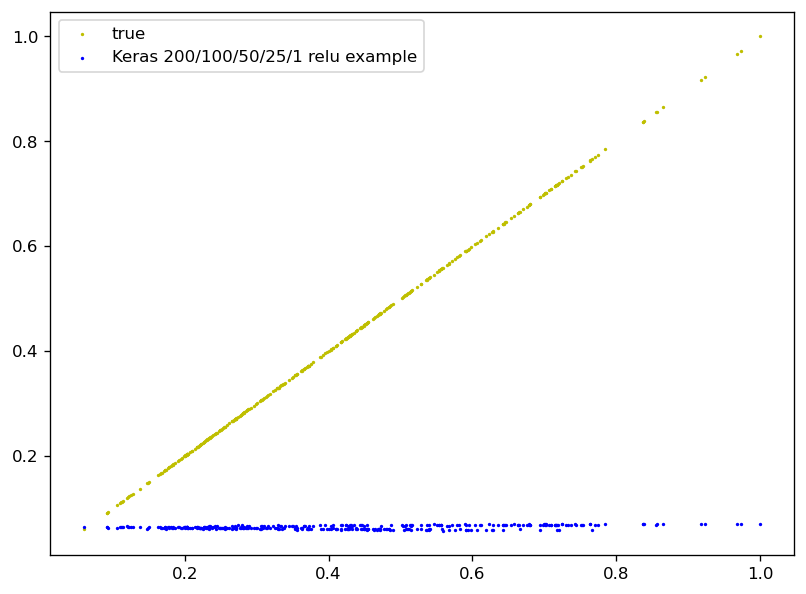

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244


In [16]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Wow that's bad.  
You can see the V shape of the tempature vs. demand curve, but this needs some work

In [17]:
# trying this Keras example: https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras

model_desc = 'Keres less verbose'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 0s 857us/step - loss: 0.3069
Epoch 2/100
118/118 [==============================] - 0s 724us/step - loss: 0.2675
Epoch 3/100
118/118 [==============================] - 0s 724us/step - loss: 0.2311
Epoch 4/100
118/118 [==============================] - 0s 724us/step - loss: 0.1989
Epoch 5/100
118/118 [==============================] - 0s 785us/step - loss: 0.1707
Epoch 6/100
118/118 [==============================] - 0s 792us/step - loss: 0.1468
Epoch 7/100
118/118 [==============================] - 0s 723us/step - loss: 0.1265
Epoch 8/100
118/118 [==============================] - 0s 723us/step - loss: 0.1091
Epoch 9/100
118/118 [==============================] - 0s 668us/step - loss: 0.0942
Epoch 10/100
118/118 [==============================] - 0s 724us/step - loss: 0.0817
Epoch 11/100
118/118 [==============================] - 0s 664us/step - loss: 0.0712
Epoch 12/100
118/118 [==============================] - 0s 779us/step - lo

118/118 [==============================] - 0s 857us/step - loss: 0.0087
Epoch 98/100
118/118 [==============================] - 0s 857us/step - loss: 0.0086
Epoch 99/100
118/118 [==============================] - 0s 857us/step - loss: 0.0084
Epoch 100/100
118/118 [==============================] - 0s 857us/step - loss: 0.0083


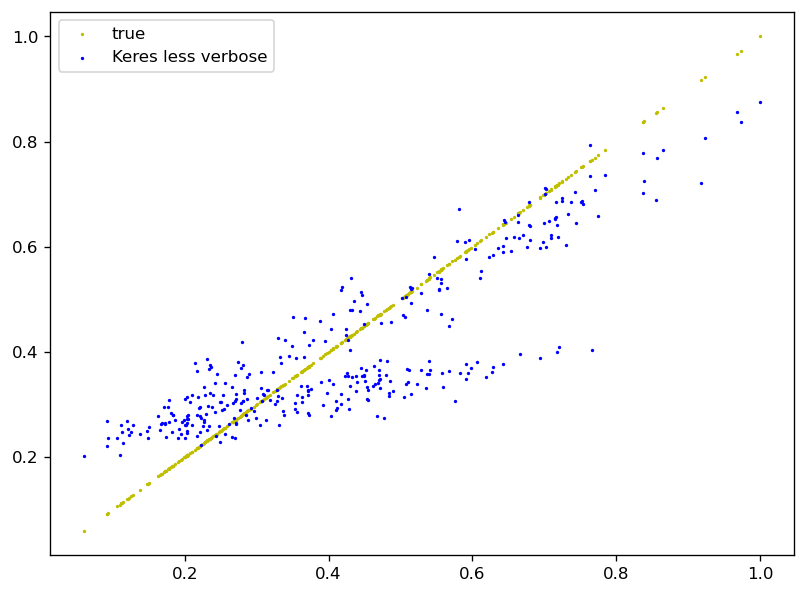

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501


In [18]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Better
But not good.  Continue to try different things below:

In [19]:
model_desc = 'Keres wider middle'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 1s 2ms/step - loss: 0.0985
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 11/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 12/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 13/100


118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 100/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0020


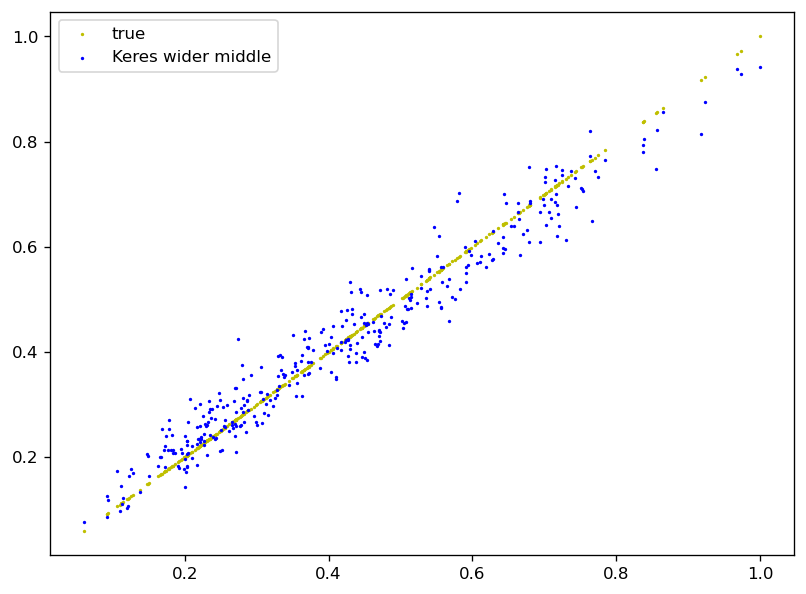

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073


In [20]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

### That is about as good as the scikit-learn models on the same data
only much, much slower :)

In [21]:
model_desc = 'Keres widerer middle'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 0.1815
Epoch 2/100
118/118 [==============================] - 1s 4ms/step - loss: 0.1132
Epoch 3/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0732
Epoch 4/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0512
Epoch 5/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0399
Epoch 6/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0341
Epoch 7/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0305
Epoch 8/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0278
Epoch 9/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0256
Epoch 10/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0237
Epoch 11/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0221
Epoch 12/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0206
Epoch 13/100


118/118 [==============================] - 1s 4ms/step - loss: 0.0026
Epoch 100/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0026


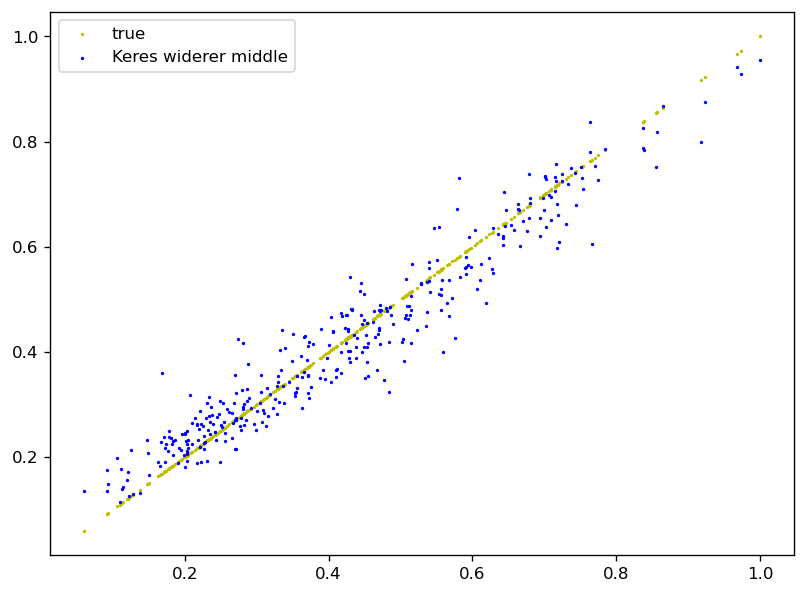

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133


In [22]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [23]:
model_desc = 'Keres wider middle 200 epochs'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 1s 2ms/step - loss: 0.1978
Epoch 2/200
118/118 [==============================] - 0s 2ms/step - loss: 0.1214
Epoch 3/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0801
Epoch 4/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 5/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 6/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 7/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 8/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 9/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 10/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 11/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 12/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 13/200


118/118 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 100/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 101/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 102/200
118/118 [==============================] - ETA: 0s - loss: 0.002 - 0s 2ms/step - loss: 0.0021
Epoch 103/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 104/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 105/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 106/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 107/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 108/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 109/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 110/200
118/118 [==============================] - 0s 2ms/st

118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 197/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 198/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 199/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 200/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0017


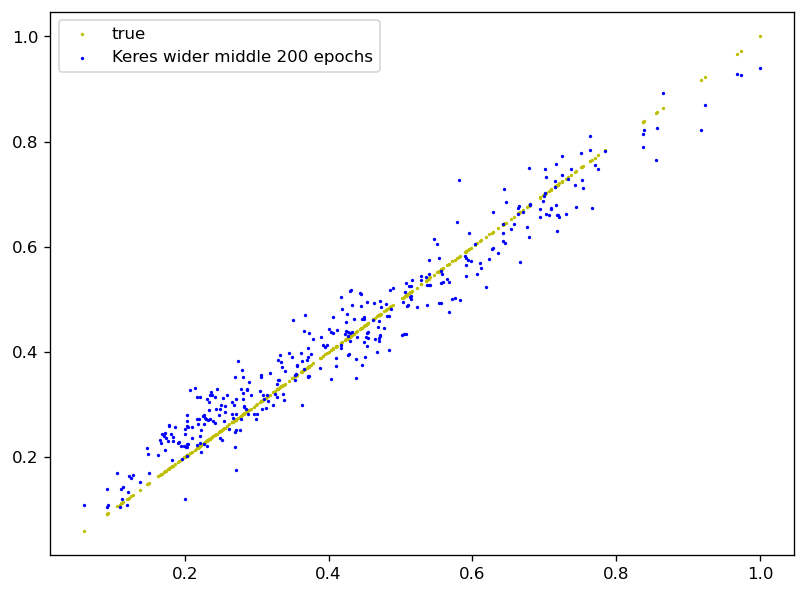

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406


In [24]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [25]:
model_desc = 'Keres 200-2000-20'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 1s 4ms/step - loss: 0.0969
Epoch 2/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0588
Epoch 3/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 4/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0358
Epoch 5/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 6/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0300
Epoch 7/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 8/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 9/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0249
Epoch 10/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 11/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 12/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 13/200


118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 100/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 101/200
118/118 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 102/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 103/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 104/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 105/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 106/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 107/200
118/118 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 108/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 109/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 110/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 

118/118 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 197/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 198/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 199/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 200/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0018


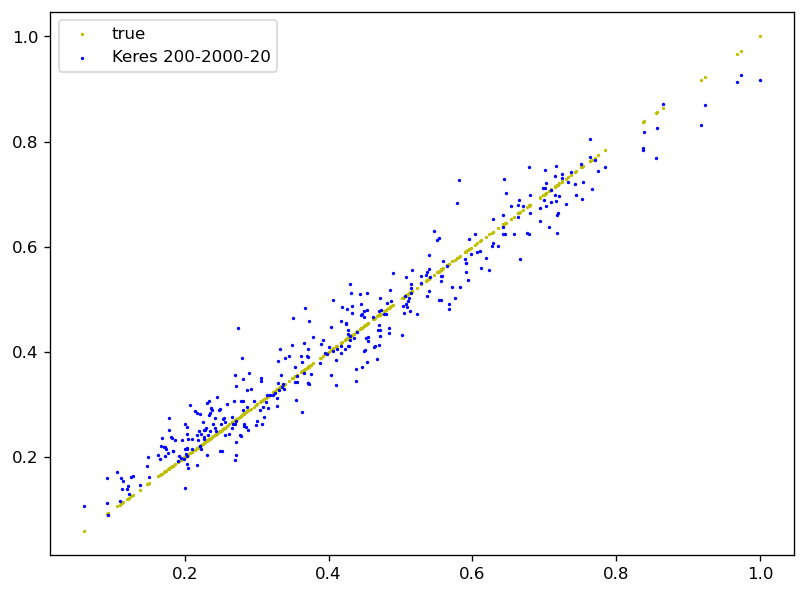

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650


In [26]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [27]:
# this one takes a long time and doesn't work well.  skip.

model_desc = 'Keres 482-2000-200-20'

# Model from example
model = Sequential()
model.add(Dense(482, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

# model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

# y_pred = model.predict(X_test)

In [28]:
# try RMSprop 
# this one is also slow and can be skipped

from tensorflow.keras.optimizers import RMSprop

model_desc = 'Keres 482-2000-200-20 RMSprop'

# Model from example
model = Sequential()
model.add(Dense(482, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

# model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

# y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0460
Epoch 2/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0068
Epoch 3/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0050
Epoch 4/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0047
Epoch 5/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0037
Epoch 6/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0034
Epoch 7/200
118/118 [==============================] - 1s 13ms/step - loss: 0.0035
Epoch 8/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0028
Epoch 9/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0030
Epoch 10/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0030
Epoch 11/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0027
Epoch 12/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0029
E

118/118 [==============================] - 2s 14ms/step - loss: 0.0012
Epoch 99/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0013
Epoch 100/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0013
Epoch 101/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0013
Epoch 102/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0013
Epoch 103/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0012
Epoch 104/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0012
Epoch 105/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0012
Epoch 106/200
118/118 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 107/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0012
Epoch 108/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0012
Epoch 109/200
118/118 [==============================] - 2s 13ms/step - loss: 0.

118/118 [==============================] - 2s 14ms/step - loss: 9.0454e-04
Epoch 194/200
118/118 [==============================] - 2s 13ms/step - loss: 9.0395e-04
Epoch 195/200
118/118 [==============================] - 2s 13ms/step - loss: 9.2379e-04
Epoch 196/200
118/118 [==============================] - 2s 13ms/step - loss: 8.4311e-04
Epoch 197/200
118/118 [==============================] - 2s 13ms/step - loss: 8.7021e-04
Epoch 198/200
118/118 [==============================] - 2s 13ms/step - loss: 8.6541e-04
Epoch 199/200
118/118 [==============================] - 2s 14ms/step - loss: 8.6620e-04
Epoch 200/200
118/118 [==============================] - 2s 14ms/step - loss: 8.7787e-04


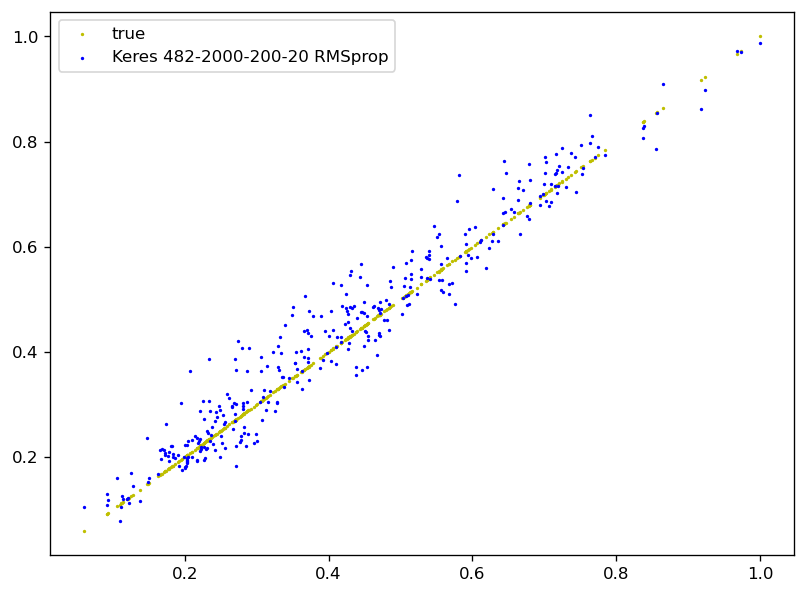

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979


In [29]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [30]:
from tensorflow.keras.layers import LeakyReLU

model_desc = 'Keres 200-2000-20 leaky'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(20))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 667us/step - loss: 0.7945
Epoch 2/200
118/118 [==============================] - 0s 590us/step - loss: 0.7330
Epoch 3/200
118/118 [==============================] - 0s 534us/step - loss: 0.6715
Epoch 4/200
118/118 [==============================] - 0s 590us/step - loss: 0.6105
Epoch 5/200
118/118 [==============================] - 0s 590us/step - loss: 0.5519
Epoch 6/200
118/118 [==============================] - 0s 730us/step - loss: 0.4964
Epoch 7/200
118/118 [==============================] - 0s 567us/step - loss: 0.4451
Epoch 8/200
118/118 [==============================] - 0s 663us/step - loss: 0.3963
Epoch 9/200
118/118 [==============================] - 0s 723us/step - loss: 0.3516
Epoch 10/200
118/118 [==============================] - 0s 724us/step - loss: 0.3117
Epoch 11/200
118/118 [==============================] - 0s 668us/step - loss: 0.2741
Epoch 12/200
118/118 [==============================] - 0s 668us/step - lo

118/118 [==============================] - 0s 593us/step - loss: 0.0098
Epoch 98/200
118/118 [==============================] - 0s 590us/step - loss: 0.0097
Epoch 99/200
118/118 [==============================] - 0s 590us/step - loss: 0.0095
Epoch 100/200
118/118 [==============================] - 0s 668us/step - loss: 0.0094
Epoch 101/200
118/118 [==============================] - 0s 724us/step - loss: 0.0092
Epoch 102/200
118/118 [==============================] - 0s 590us/step - loss: 0.0091
Epoch 103/200
118/118 [==============================] - 0s 668us/step - loss: 0.0089
Epoch 104/200
118/118 [==============================] - 0s 625us/step - loss: 0.0088
Epoch 105/200
118/118 [==============================] - 0s 534us/step - loss: 0.0086
Epoch 106/200
118/118 [==============================] - 0s 724us/step - loss: 0.0085
Epoch 107/200
118/118 [==============================] - 0s 590us/step - loss: 0.0084
Epoch 108/200
118/118 [==============================] - 0s 668us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0041
Epoch 193/200
118/118 [==============================] - 0s 728us/step - loss: 0.0040
Epoch 194/200
118/118 [==============================] - 0s 560us/step - loss: 0.0040
Epoch 195/200
118/118 [==============================] - 0s 681us/step - loss: 0.0040
Epoch 196/200
118/118 [==============================] - 0s 590us/step - loss: 0.0040
Epoch 197/200
118/118 [==============================] - 0s 668us/step - loss: 0.0040
Epoch 198/200
118/118 [==============================] - 0s 590us/step - loss: 0.0040
Epoch 199/200
118/118 [==============================] - 0s 590us/step - loss: 0.0040
Epoch 200/200
118/118 [==============================] - 0s 750us/step - loss: 0.0039


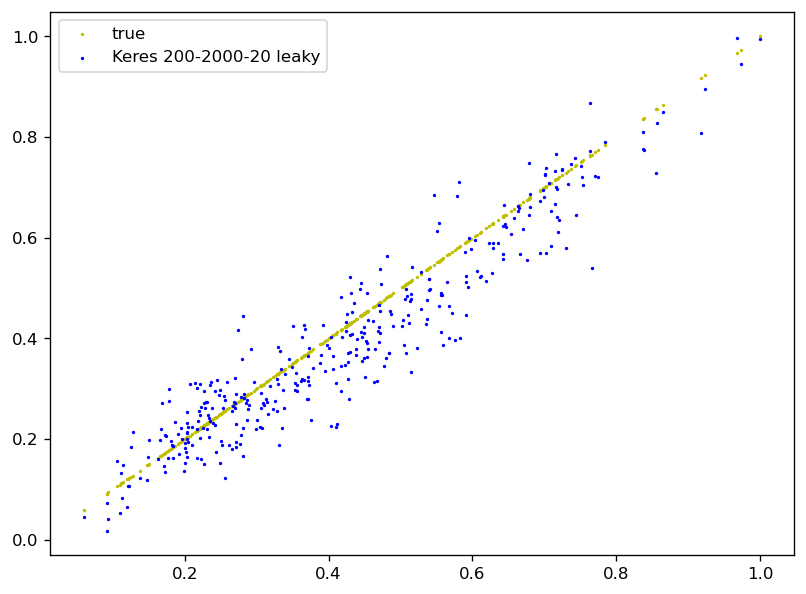

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979
7,Keres 200-2000-20 leaky,0.896720,0.877507,0.224522,0.054349,0.004750,0.152270,0.046414


In [31]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [32]:
# best so far!
from tensorflow.keras.optimizers import RMSprop

model_desc = 'Keres 200-2000-20 leaky RMSprop'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(20))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 590us/step - loss: 0.0149
Epoch 2/200
118/118 [==============================] - 0s 534us/step - loss: 0.0079
Epoch 3/200
118/118 [==============================] - 0s 724us/step - loss: 0.0070
Epoch 4/200
118/118 [==============================] - 0s 590us/step - loss: 0.0057
Epoch 5/200
118/118 [==============================] - 0s 723us/step - loss: 0.0050
Epoch 6/200
118/118 [==============================] - 0s 651us/step - loss: 0.0047
Epoch 7/200
118/118 [==============================] - 0s 578us/step - loss: 0.0036
Epoch 8/200
118/118 [==============================] - 0s 724us/step - loss: 0.0037
Epoch 9/200
118/118 [==============================] - 0s 590us/step - loss: 0.0035
Epoch 10/200
118/118 [==============================] - 0s 802us/step - loss: 0.0031
Epoch 11/200
118/118 [==============================] - 0s 724us/step - loss: 0.0030
Epoch 12/200
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 723us/step - loss: 0.0014
Epoch 98/200
118/118 [==============================] - 0s 668us/step - loss: 0.0014
Epoch 99/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 100/200
118/118 [==============================] - 0s 724us/step - loss: 0.0014
Epoch 101/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 102/200
118/118 [==============================] - 0s 668us/step - loss: 0.0013
Epoch 103/200
118/118 [==============================] - 0s 724us/step - loss: 0.0014
Epoch 104/200
118/118 [==============================] - 0s 629us/step - loss: 0.0014
Epoch 105/200
118/118 [==============================] - 0s 551us/step - loss: 0.0014
Epoch 106/200
118/118 [==============================] - 0s 668us/step - loss: 0.0013
Epoch 107/200
118/118 [==============================] - 0s 724us/step - loss: 0.0013
Epoch 108/200
118/118 [==============================] - 0s 723us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 193/200
118/118 [==============================] - 0s 668us/step - loss: 0.0012
Epoch 194/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 195/200
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 196/200
118/118 [==============================] - 0s 643us/step - loss: 0.0012
Epoch 197/200
118/118 [==============================] - 0s 589us/step - loss: 0.0012
Epoch 198/200
118/118 [==============================] - 0s 599us/step - loss: 0.0012
Epoch 199/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 200/200
118/118 [==============================] - 0s 668us/step - loss: 0.0012


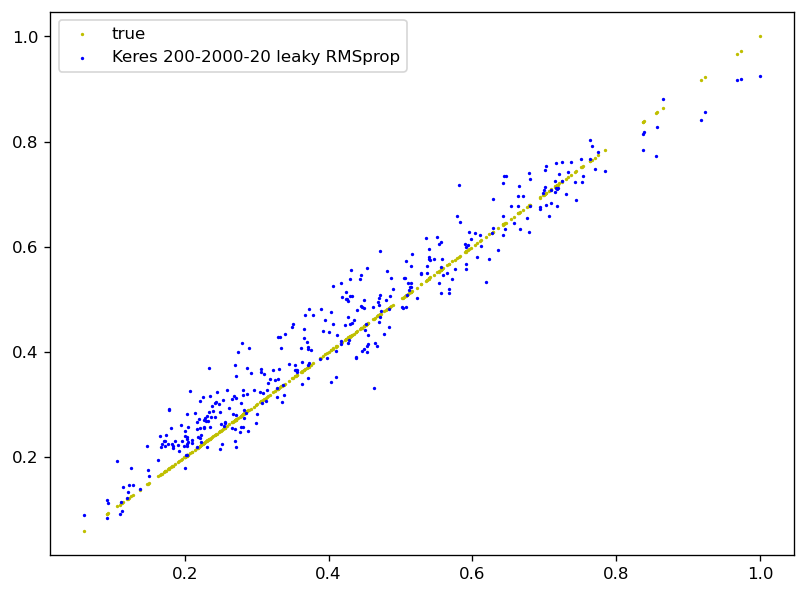

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979
7,Keres 200-2000-20 leaky,0.896720,0.877507,0.224522,0.054349,0.004750,0.152270,0.046414
8,Keres 200-2000-20 leaky RMSprop,0.949542,0.936538,0.137650,0.039433,0.002461,0.122501,0.033038


In [33]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [34]:
model_desc = 'Keres 482-2000L-200L RMSprop'
from tensorflow.keras.optimizers import RMSprop

# Model from example
model = Sequential()
model.add(Dense(482, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 590us/step - loss: 0.0255
Epoch 2/200
118/118 [==============================] - 0s 723us/step - loss: 0.0113
Epoch 3/200
118/118 [==============================] - 0s 723us/step - loss: 0.0082
Epoch 4/200
118/118 [==============================] - 0s 857us/step - loss: 0.0064
Epoch 5/200
118/118 [==============================] - 0s 723us/step - loss: 0.0050
Epoch 6/200
118/118 [==============================] - 0s 668us/step - loss: 0.0044
Epoch 7/200
118/118 [==============================] - 0s 590us/step - loss: 0.0038
Epoch 8/200
118/118 [==============================] - 0s 724us/step - loss: 0.0033
Epoch 9/200
118/118 [==============================] - 0s 663us/step - loss: 0.0029
Epoch 10/200
118/118 [==============================] - 0s 917us/step - loss: 0.0030
Epoch 11/200
118/118 [==============================] - 0s 724us/step - loss: 0.0026
Epoch 12/200
118/118 [==============================] - 0s 857us/step - lo

118/118 [==============================] - 0s 724us/step - loss: 0.0014
Epoch 98/200
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 99/200
118/118 [==============================] - 0s 711us/step - loss: 0.0013
Epoch 100/200
118/118 [==============================] - 0s 732us/step - loss: 0.0014
Epoch 101/200
118/118 [==============================] - 0s 723us/step - loss: 0.0014
Epoch 102/200
118/118 [==============================] - 0s 668us/step - loss: 0.0014
Epoch 103/200
118/118 [==============================] - 0s 724us/step - loss: 0.0013
Epoch 104/200
118/118 [==============================] - 0s 724us/step - loss: 0.0013
Epoch 105/200
118/118 [==============================] - 0s 820us/step - loss: 0.0013
Epoch 106/200
118/118 [==============================] - 0s 610us/step - loss: 0.0014
Epoch 107/200
118/118 [==============================] - 0s 723us/step - loss: 0.0013
Epoch 108/200
118/118 [==============================] - 0s 668us/step

118/118 [==============================] - 0s 724us/step - loss: 0.0012
Epoch 193/200
118/118 [==============================] - 0s 723us/step - loss: 0.0011
Epoch 194/200
118/118 [==============================] - 0s 789us/step - loss: 0.0012
Epoch 195/200
118/118 [==============================] - 0s 638us/step - loss: 0.0012
Epoch 196/200
118/118 [==============================] - 0s 857us/step - loss: 0.0012
Epoch 197/200
118/118 [==============================] - 0s 724us/step - loss: 0.0012
Epoch 198/200
118/118 [==============================] - 0s 857us/step - loss: 0.0012
Epoch 199/200
118/118 [==============================] - 0s 723us/step - loss: 0.0012
Epoch 200/200
118/118 [==============================] - 0s 737us/step - loss: 0.0012


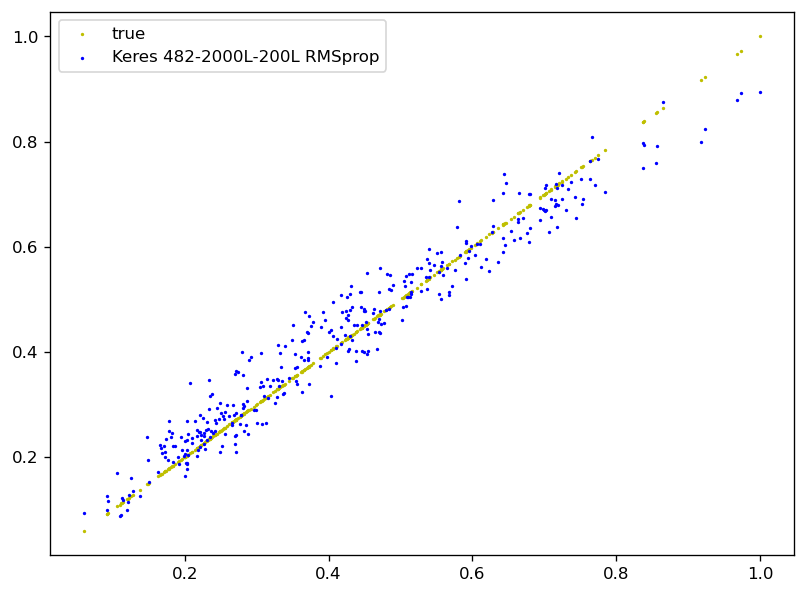

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.014079,-3.277153,0.929066,0.357272,0.165862,0.802497,0.346244
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979
7,Keres 200-2000-20 leaky,0.896720,0.877507,0.224522,0.054349,0.004750,0.152270,0.046414
8,Keres 200-2000-20 leaky RMSprop,0.949542,0.936538,0.137650,0.039433,0.002461,0.122501,0.033038
9,Keres 482-2000L-200L RMSprop,0.949582,0.947558,0.133449,0.035590,0.002034,0.104283,0.029657


In [35]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [36]:

model_desc = 'Keres 482-2000L-200L RMSprop 300epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 534us/step - loss: 0.0113
Epoch 2/300
118/118 [==============================] - 0s 590us/step - loss: 0.0062
Epoch 3/300
118/118 [==============================] - 0s 590us/step - loss: 0.0057
Epoch 4/300
118/118 [==============================] - 0s 534us/step - loss: 0.0049
Epoch 5/300
118/118 [==============================] - 0s 590us/step - loss: 0.0049
Epoch 6/300
118/118 [==============================] - 0s 652us/step - loss: 0.0045
Epoch 7/300
118/118 [==============================] - 0s 610us/step - loss: 0.0042
Epoch 8/300
118/118 [==============================] - 0s 577us/step - loss: 0.0041
Epoch 9/300
118/118 [==============================] - 0s 590us/step - loss: 0.0044
Epoch 10/300
118/118 [==============================] - 0s 590us/step - loss: 0.0042
Epoch 11/300
118/118 [==============================] - 0s 534us/step - loss: 0.0040
Epoch 12/300
118/118 [==============================] - 0s 724us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 98/300
118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 99/300
118/118 [==============================] - 0s 721us/step - loss: 0.0015
Epoch 100/300
118/118 [==============================] - 0s 584us/step - loss: 0.0015
Epoch 101/300
118/118 [==============================] - 0s 654us/step - loss: 0.0016
Epoch 102/300
118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 103/300
118/118 [==============================] - 0s 534us/step - loss: 0.0016
Epoch 104/300
118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 105/300
118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 106/300
118/118 [==============================] - 0s 668us/step - loss: 0.0015
Epoch 107/300
118/118 [==============================] - 0s 651us/step - loss: 0.0015
Epoch 108/300
118/118 [==============================] - 0s 663us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 193/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 194/300
118/118 [==============================] - 0s 608us/step - loss: 0.0013
Epoch 195/300
118/118 [==============================] - 0s 495us/step - loss: 0.0013
Epoch 196/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 197/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 198/300
118/118 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 199/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 200/300
118/118 [==============================] - 0s 591us/step - loss: 0.0013
Epoch 201/300
118/118 [==============================] - 0s 670us/step - loss: 0.0013
Epoch 202/300
118/118 [==============================] - 0s 575us/step - loss: 0.0013
Epoch 203/300
118/118 [==============================] - 0s 581us/st

118/118 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 288/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 289/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 290/300
118/118 [==============================] - 0s 655us/step - loss: 0.0012
Epoch 291/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 292/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 293/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 294/300
118/118 [==============================] - 0s 668us/step - loss: 0.0011
Epoch 295/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 296/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 297/300
118/118 [==============================] - 0s 659us/step - loss: 0.0012
Epoch 298/300
118/118 [==============================] - 0s 512us/st

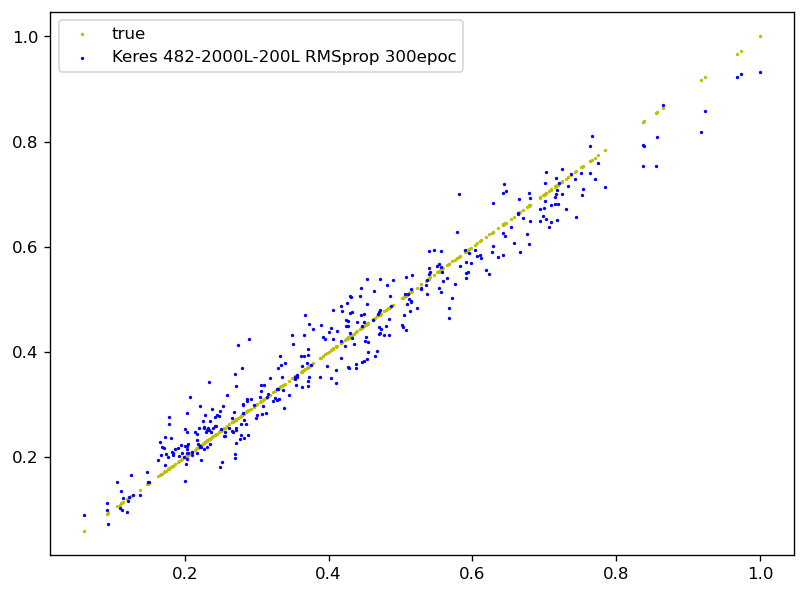

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
1,Keres less verbose,0.738259,0.727336,0.361418,0.081754,0.010574,0.253170,0.068501
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979
7,Keres 200-2000-20 leaky,0.896720,0.877507,0.224522,0.054349,0.004750,0.152270,0.046414
8,Keres 200-2000-20 leaky RMSprop,0.949542,0.936538,0.137650,0.039433,0.002461,0.122501,0.033038
9,Keres 482-2000L-200L RMSprop,0.949582,0.947558,0.133449,0.035590,0.002034,0.104283,0.029657
10,Keres 482-2000L-200L RMSprop 300epoc,0.953700,0.953690,0.137895,0.033712,0.001796,0.096719,0.027226


In [37]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [38]:

model_desc = 'Keres 482-2000L-400L-100R RMSprop 300'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(400))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())

model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 724us/step - loss: 0.0101
Epoch 2/300
118/118 [==============================] - 0s 534us/step - loss: 0.0041
Epoch 3/300
118/118 [==============================] - 0s 642us/step - loss: 0.0036
Epoch 4/300
118/118 [==============================] - 0s 668us/step - loss: 0.0030
Epoch 5/300
118/118 [==============================] - 0s 724us/step - loss: 0.0029
Epoch 6/300
118/118 [==============================] - 0s 723us/step - loss: 0.0025
Epoch 7/300
118/118 [==============================] - 0s 668us/step - loss: 0.0024
Epoch 8/300
118/118 [==============================] - 0s 724us/step - loss: 0.0022
Epoch 9/300
118/118 [==============================] - 0s 760us/step - loss: 0.0021
Epoch 10/300
118/118 [==============================] - 0s 669us/step - loss: 0.0021
Epoch 11/300
118/118 [==============================] - 0s 724us/step - loss: 0.0021
Epoch 12/300
118/118 [==============================] - 0s 723us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 98/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 99/300
118/118 [==============================] - 0s 668us/step - loss: 0.0012
Epoch 100/300
118/118 [==============================] - 0s 724us/step - loss: 0.0012
Epoch 101/300
118/118 [==============================] - 0s 795us/step - loss: 0.0012
Epoch 102/300
118/118 [==============================] - 0s 635us/step - loss: 0.0011
Epoch 103/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 104/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 105/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 106/300
118/118 [==============================] - 0s 724us/step - loss: 0.0011
Epoch 107/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 108/300
118/118 [==============================] - 0s 759us/step

118/118 [==============================] - 0s 590us/step - loss: 8.6221e-04
Epoch 191/300
118/118 [==============================] - 0s 724us/step - loss: 8.7988e-04
Epoch 192/300
118/118 [==============================] - 0s 668us/step - loss: 8.8339e-04
Epoch 193/300
118/118 [==============================] - 0s 590us/step - loss: 8.8407e-04
Epoch 194/300
118/118 [==============================] - 0s 768us/step - loss: 9.0551e-04
Epoch 195/300
118/118 [==============================] - 0s 527us/step - loss: 8.7826e-04
Epoch 196/300
118/118 [==============================] - 0s 590us/step - loss: 8.8500e-04
Epoch 197/300
118/118 [==============================] - 0s 668us/step - loss: 8.6443e-04
Epoch 198/300
118/118 [==============================] - 0s 724us/step - loss: 8.8624e-04
Epoch 199/300
118/118 [==============================] - 0s 724us/step - loss: 9.1948e-04
Epoch 200/300
118/118 [==============================] - 0s 590us/step - loss: 8.6179e-04
Epoch 201/300
118/118 [=

118/118 [==============================] - 0s 590us/step - loss: 6.9055e-04
Epoch 282/300
118/118 [==============================] - 0s 724us/step - loss: 6.9026e-04
Epoch 283/300
118/118 [==============================] - 0s 668us/step - loss: 7.2540e-04
Epoch 284/300
118/118 [==============================] - 0s 534us/step - loss: 6.9141e-04
Epoch 285/300
118/118 [==============================] - 0s 695us/step - loss: 6.5499e-04
Epoch 286/300
118/118 [==============================] - 0s 592us/step - loss: 6.4932e-04
Epoch 287/300
118/118 [==============================] - 0s 724us/step - loss: 7.0635e-04
Epoch 288/300
118/118 [==============================] - 0s 668us/step - loss: 7.2277e-04
Epoch 289/300
118/118 [==============================] - 0s 590us/step - loss: 7.0697e-04
Epoch 290/300
118/118 [==============================] - 0s 724us/step - loss: 6.9112e-04
Epoch 291/300
118/118 [==============================] - 0s 590us/step - loss: 6.6956e-04
Epoch 292/300
118/118 [=

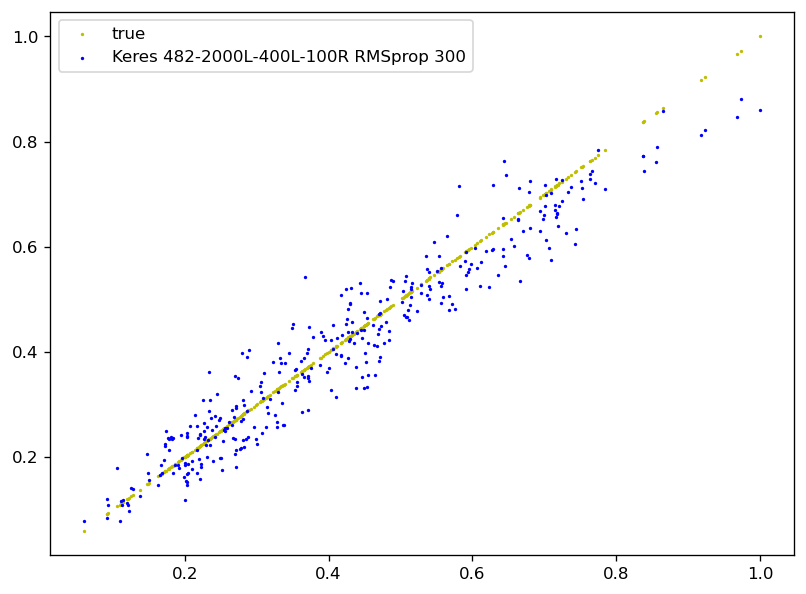

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
2,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979
7,Keres 200-2000-20 leaky,0.896720,0.877507,0.224522,0.054349,0.004750,0.152270,0.046414
8,Keres 200-2000-20 leaky RMSprop,0.949542,0.936538,0.137650,0.039433,0.002461,0.122501,0.033038
9,Keres 482-2000L-200L RMSprop,0.949582,0.947558,0.133449,0.035590,0.002034,0.104283,0.029657
10,Keres 482-2000L-200L RMSprop 300epoc,0.953700,0.953690,0.137895,0.033712,0.001796,0.096719,0.027226
11,Keres 482-2000L-400L-100R RMSprop 300,0.928858,0.926012,0.174880,0.042750,0.002869,0.117493,0.036419


In [39]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [40]:

model_desc = 'Keres 482-5000L-200L RMSprop 300epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(5000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 723us/step - loss: 0.0295
Epoch 2/300
118/118 [==============================] - 0s 590us/step - loss: 0.0068
Epoch 3/300
118/118 [==============================] - 0s 801us/step - loss: 0.0053
Epoch 4/300
118/118 [==============================] - 0s 635us/step - loss: 0.0049
Epoch 5/300
118/118 [==============================] - 0s 541us/step - loss: 0.0046
Epoch 6/300
118/118 [==============================] - 0s 577us/step - loss: 0.0043
Epoch 7/300
118/118 [==============================] - 0s 668us/step - loss: 0.0042
Epoch 8/300
118/118 [==============================] - 0s 590us/step - loss: 0.0040
Epoch 9/300
118/118 [==============================] - 0s 590us/step - loss: 0.0041
Epoch 10/300
118/118 [==============================] - 0s 590us/step - loss: 0.0038
Epoch 11/300
118/118 [==============================] - 0s 668us/step - loss: 0.0037
Epoch 12/300
118/118 [==============================] - 0s 729us/step - lo

118/118 [==============================] - 0s 690us/step - loss: 0.0015
Epoch 98/300
118/118 [==============================] - 0s 580us/step - loss: 0.0015
Epoch 99/300
118/118 [==============================] - 0s 724us/step - loss: 0.0015
Epoch 100/300
118/118 [==============================] - 0s 534us/step - loss: 0.0016
Epoch 101/300
118/118 [==============================] - 0s 724us/step - loss: 0.0016
Epoch 102/300
118/118 [==============================] - 0s 590us/step - loss: 0.0016
Epoch 103/300
118/118 [==============================] - 0s 724us/step - loss: 0.0016
Epoch 104/300
118/118 [==============================] - 0s 625us/step - loss: 0.0015
Epoch 105/300
118/118 [==============================] - 0s 563us/step - loss: 0.0015
Epoch 106/300
118/118 [==============================] - 0s 654us/step - loss: 0.0015
Epoch 107/300
118/118 [==============================] - 0s 724us/step - loss: 0.0015
Epoch 108/300
118/118 [==============================] - 0s 534us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 193/300
118/118 [==============================] - 0s 638us/step - loss: 0.0013
Epoch 194/300
118/118 [==============================] - 0s 521us/step - loss: 0.0012
Epoch 195/300
118/118 [==============================] - 0s 668us/step - loss: 0.0013
Epoch 196/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 197/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 198/300
118/118 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 199/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 200/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 201/300
118/118 [==============================] - 0s 595us/step - loss: 0.0012
Epoch 202/300
118/118 [==============================] - 0s 663us/step - loss: 0.0012
Epoch 203/300
118/118 [==============================] - 0s 590us/st

118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 288/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 289/300
118/118 [==============================] - 0s 555us/step - loss: 0.0011
Epoch 290/300
118/118 [==============================] - 0s 624us/step - loss: 0.0011
Epoch 291/300
118/118 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 292/300
118/118 [==============================] - 0s 724us/step - loss: 0.0011
Epoch 293/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 294/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 295/300
118/118 [==============================] - 0s 668us/step - loss: 0.0012
Epoch 296/300
118/118 [==============================] - 0s 634us/step - loss: 0.0011
Epoch 297/300
118/118 [==============================] - 0s 530us/step - loss: 0.0011
Epoch 298/300
118/118 [==============================] - 0s 668us/st

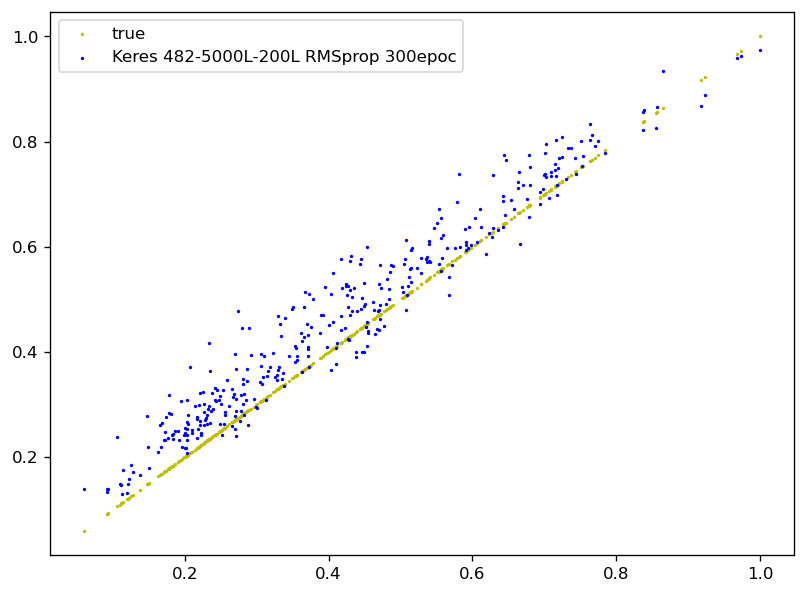

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
3,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979
7,Keres 200-2000-20 leaky,0.896720,0.877507,0.224522,0.054349,0.004750,0.152270,0.046414
8,Keres 200-2000-20 leaky RMSprop,0.949542,0.936538,0.137650,0.039433,0.002461,0.122501,0.033038
9,Keres 482-2000L-200L RMSprop,0.949582,0.947558,0.133449,0.035590,0.002034,0.104283,0.029657
10,Keres 482-2000L-200L RMSprop 300epoc,0.953700,0.953690,0.137895,0.033712,0.001796,0.096719,0.027226
11,Keres 482-2000L-400L-100R RMSprop 300,0.928858,0.926012,0.174880,0.042750,0.002869,0.117493,0.036419
12,Keres 482-5000L-200L RMSprop 300epoc,0.946741,0.892306,0.203464,0.051890,0.004176,0.170313,0.043812


In [41]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [42]:

model_desc = 'Keres 482-100L-1000L-100L RMSprop 200epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(100))
model.add(LeakyReLU(1000))
model.add(LeakyReLU(100))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 553us/step - loss: 0.0178
Epoch 2/200
118/118 [==============================] - 0s 681us/step - loss: 0.0053
Epoch 3/200
118/118 [==============================] - 0s 590us/step - loss: 0.0047
Epoch 4/200
118/118 [==============================] - 0s 668us/step - loss: 0.0042
Epoch 5/200
118/118 [==============================] - 0s 590us/step - loss: 0.0037
Epoch 6/200
118/118 [==============================] - 0s 590us/step - loss: 0.0036
Epoch 7/200
118/118 [==============================] - 0s 616us/step - loss: 0.0036
Epoch 8/200
118/118 [==============================] - 0s 538us/step - loss: 0.0033
Epoch 9/200
118/118 [==============================] - 0s 672us/step - loss: 0.0032
Epoch 10/200
118/118 [==============================] - 0s 723us/step - loss: 0.0031
Epoch 11/200
118/118 [==============================] - 0s 723us/step - loss: 0.0028
Epoch 12/200
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 98/200
118/118 [==============================] - 0s 645us/step - loss: 0.0014
Epoch 99/200
118/118 [==============================] - 0s 569us/step - loss: 0.0015
Epoch 100/200
118/118 [==============================] - 0s 616us/step - loss: 0.0015
Epoch 101/200
118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 102/200
118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 103/200
118/118 [==============================] - 0s 534us/step - loss: 0.0014
Epoch 104/200
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 105/200
118/118 [==============================] - 0s 668us/step - loss: 0.0015
Epoch 106/200
118/118 [==============================] - 0s 555us/step - loss: 0.0015
Epoch 107/200
118/118 [==============================] - 0s 603us/step - loss: 0.0015
Epoch 108/200
118/118 [==============================] - 0s 590us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 193/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 194/200
118/118 [==============================] - 0s 676us/step - loss: 0.0013
Epoch 195/200
118/118 [==============================] - 0s 564us/step - loss: 0.0013
Epoch 196/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 197/200
118/118 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 198/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 199/200
118/118 [==============================] - 0s 723us/step - loss: 0.0013
Epoch 200/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013


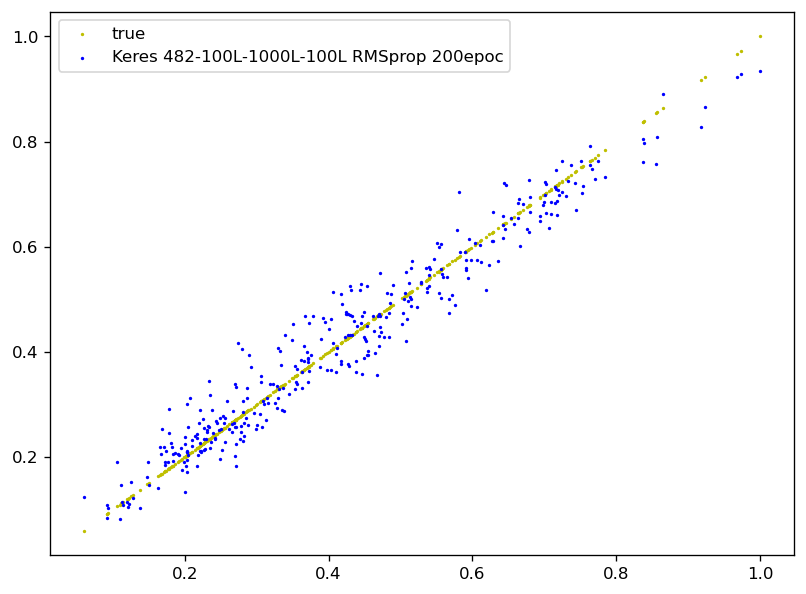

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
4,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
5,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979
7,Keres 200-2000-20 leaky,0.896720,0.877507,0.224522,0.054349,0.004750,0.152270,0.046414
8,Keres 200-2000-20 leaky RMSprop,0.949542,0.936538,0.137650,0.039433,0.002461,0.122501,0.033038
9,Keres 482-2000L-200L RMSprop,0.949582,0.947558,0.133449,0.035590,0.002034,0.104283,0.029657
10,Keres 482-2000L-200L RMSprop 300epoc,0.953700,0.953690,0.137895,0.033712,0.001796,0.096719,0.027226
11,Keres 482-2000L-400L-100R RMSprop 300,0.928858,0.926012,0.174880,0.042750,0.002869,0.117493,0.036419
12,Keres 482-5000L-200L RMSprop 300epoc,0.946741,0.892306,0.203464,0.051890,0.004176,0.170313,0.043812
13,Keres 482-100L-1000L-100L RMSprop 200epoc,0.949786,0.949718,0.142472,0.034423,0.001950,0.102252,0.025892


In [43]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

## Report best performing configurations by R2/COD

In [44]:
# Best performing models: 
report.sort_values(by='R2/COD', ignore_index=True, ascending=False)

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keres 482-2000L-200L RMSprop 300epoc,0.953700,0.953690,0.137895,0.033712,0.001796,0.096719,0.027226
1,Keres wider middle,0.952573,0.952568,0.149954,0.034346,0.001839,0.100397,0.030073
2,Keres 200-2000-20,0.952340,0.951784,0.170704,0.034247,0.001870,0.105355,0.028650
3,Keres 482-100L-1000L-100L RMSprop 200epoc,0.949786,0.949718,0.142472,0.034423,0.001950,0.102252,0.025892
4,Keres 482-2000L-200L RMSprop,0.949582,0.947558,0.133449,0.035590,0.002034,0.104283,0.029657
5,Keres wider middle 200 epochs,0.948784,0.946694,0.146469,0.036954,0.002067,0.117806,0.031406
6,Keres 482-2000-200-20 RMSprop,0.947510,0.939518,0.157017,0.036684,0.002345,0.109590,0.026979
7,Keres 200-2000-20 leaky RMSprop,0.949542,0.936538,0.137650,0.039433,0.002461,0.122501,0.033038
8,Keres widerer middle,0.932185,0.932128,0.192276,0.039588,0.002632,0.121850,0.033133
9,Keres 482-2000L-400L-100R RMSprop 300,0.928858,0.926012,0.174880,0.042750,0.002869,0.117493,0.036419



# Project Summary: 

* point one
* point two
* What I would do if this were my only problem in life